In [ ]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import sklearn.linear_model as sk

%matplotlib inline

# True/Reported Cases Graphs

The following function relies upon Tomas's deaths method to estimate the true number of COVID-19 cases. As inputs, it takes in 
1. The current amount of deaths
2. Fatality rate
3. Days from infection to death
4. Doubling time

The function returns a list containing, in order: 
1. The number of cases since the onset of symptoms
2. The number of times cases have doubled
3. The true number of cases today

Below is an example run using some experimental numbers. 

NOTE: The purpose of the print statements above the list of values is to put the information in an easily digestible format. For now, it is commented out. 

In [ ]:
# FUNCTION FOR CALCULATING TRUE AMOUNT OF COVID-19 CASES

# Fatality rate is assumed to be in percentage form 

def calc_true_cases(current_deaths, fatality_rate, days_from_infection_to_death, doubling_time):
    past_num_cases = current_deaths / (fatality_rate/100)
    num_times_cases_doubled = days_from_infection_to_death/doubling_time
    true_num_cases = past_num_cases * 2**(num_times_cases_doubled)
    #print('Number of cases', days_from_infection_to_death , 'days ago:', past_num_cases,
          #'\nNumber of times cases have doubled:', num_times_cases_doubled,
          #'\nTrue number of cases today:', true_num_cases)
    return [past_num_cases, num_times_cases_doubled, true_num_cases]

calc_true_cases(40, 5, 17, 5)


[800.0, 3.4, 8444.850628946522]

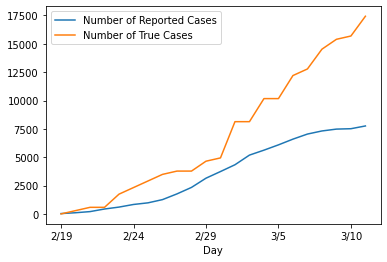

In [ ]:
# CODE FOR CALCULATING SOUTH KOREA GRAPH

deaths_table = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
south_korea_deaths_table = deaths_table.loc[deaths_table['Country/Region'] == 'Korea, South'].drop(columns=['Province/State', 'Country/Region', 'Lat', 'Long'])
list_of_south_korea_deaths = south_korea_deaths_table.values.flatten().tolist()

# list_of_south_korea_deaths is a list containing the culmative amount of deaths in South Korea from 1/22/20 to present. 

list_of_values = []
for num_deaths in list_of_south_korea_deaths:
  list_of_values += [calc_true_cases(num_deaths, 1, 20, 13)]


# list_of_values is the result of passing in list_of_south_korea_deaths into our calc_true_cases function.
# This contains, for every day: (Number of Cases, Number of Times Cases have Doubled, Number of True Cases)

true_cases_list_south_korea = []
for list in list_of_values:
  true_cases_list_south_korea += [list[2]]

# true_cases_list is the result of extracting the third item of each list, which contains the true amount of case each day.

reported_cases_table = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
south_korea_reported_table = reported_cases_table.loc[reported_cases_table['Country/Region'] == 'Korea, South'].drop(columns=['Province/State', 'Country/Region', 'Lat', 'Long'])
list_of_reported_south_korea_cases = south_korea_reported_table.values.flatten().tolist()

# We extract the data for the Reported (not true) amount of cases from John Hopkins and convert it to list form 
# list_of_reported_south_korea_cases contains this data

# Now we can compare it to our calculated true_cases_list and graph the results

list_of_dates_with_20 = reported_cases_table.columns[4:].values.tolist()
list_of_dates_without_20 = []
for date in list_of_dates_with_20:
  date = date + ' '
  date = date.replace('/20 ', '')
  list_of_dates_without_20.append(date)


deaths_over_time_south_korea = DataFrame({'Day': list_of_dates_without_20, 'Number of Reported Cases': list_of_reported_south_korea_cases, 'Number of True Cases': true_cases_list_south_korea})

shorter_table_south_korea = deaths_over_time_south_korea.iloc[28:50]
shorter_table_south_korea.plot('Day')






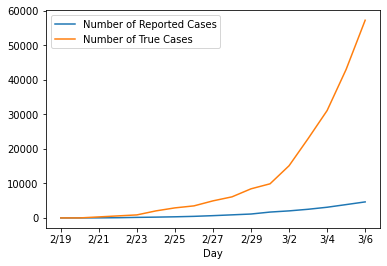

In [ ]:
# CODE FOR CALCULATING ITALY GRAPH

deaths_table = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
italy_deaths_table = deaths_table.loc[deaths_table['Country/Region'] == 'Italy'].drop(columns=['Province/State', 'Country/Region', 'Lat', 'Long'])
list_of_italy_deaths = italy_deaths_table.values.flatten().tolist()

# list_of_italy_deaths is a list containing the culmative amount of deaths in Italy from 1/22/20 to present. 

list_of_values = []
for num_deaths in list_of_italy_deaths:
  list_of_values += [calc_true_cases(num_deaths, 1, 20, 13)]


# list_of_values is the result of passing in list_of_italy_deaths into our calc_true_cases function.
# This contains, for every day: (Number of Cases, Number of Times Cases have Doubled, Number of True Cases)

true_cases_list_italy = []
for list in list_of_values:
  true_cases_list_italy += [list[2]]

# true_cases_list is the result of extracting the third item of each list, which contains the true amount of case each day.

italy_reported_table = reported_cases_table.loc[reported_cases_table['Country/Region'] == 'Italy'].drop(columns=['Province/State', 'Country/Region', 'Lat', 'Long'])
list_of_reported_italy_cases = italy_reported_table.values.flatten().tolist()

# We extract the data for the Reported (not true) amount of cases from John Hopkins and convert it to list form 
# list_of_reported_italy_cases contains this data

# Now we can compare it to our calculated true_cases_list and graph the results

deaths_over_time_italy = DataFrame({'Day': list_of_dates_without_20, 'Number of Reported Cases': list_of_reported_italy_cases, 'Number of True Cases': true_cases_list_italy})

shorter_table_italy = deaths_over_time_italy.iloc[28:45]
shorter_table_italy.plot('Day')

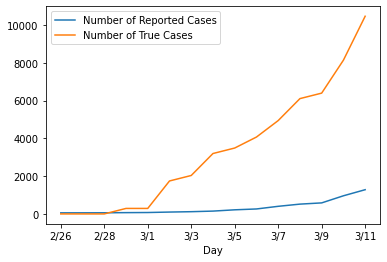

In [ ]:
# CODE FOR CALCULATING U.S GRAPH

deaths_table = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
us_deaths_table = deaths_table.loc[deaths_table['Country/Region'] == 'US'].drop(columns=['Province/State', 'Country/Region', 'Lat', 'Long'])
list_of_us_deaths = us_deaths_table.values.flatten().tolist()

# list_of_us_deaths is a list containing the culmative amount of deaths in the U.S from 1/22/20 to present. 

list_of_values = []
for num_deaths in list_of_us_deaths:
  list_of_values += [calc_true_cases(num_deaths, 1, 20, 13)]


# list_of_values is the result of passing in list_of_us_deaths into our calc_true_cases function.
# This contains, for every day: (Number of Cases, Number of Times Cases have Doubled, Number of True Cases)

true_cases_list_us = []
for list in list_of_values:
  true_cases_list_us += [list[2]]

# true_cases_list is the result of extracting the third item of each list, which contains the true amount of case each day.

us_reported_table = reported_cases_table.loc[reported_cases_table['Country/Region'] == 'US'].drop(columns=['Province/State', 'Country/Region', 'Lat', 'Long'])
list_of_reported_us_cases = us_reported_table.values.flatten().tolist()

# We extract the data for the Reported (not true) amount of cases from John Hopkins and convert it to list form 
# list_of_reported_us_cases contains this data

# Now we can compare it to our calculated true_cases_list and graph the results

deaths_over_time_us = DataFrame({'Day': list_of_dates_without_20, 'Number of Reported Cases': list_of_reported_us_cases, 'Number of True Cases': true_cases_list_us})

shorter_table_us = deaths_over_time_us.iloc[35:50]
shorter_table_us.plot('Day')

In [ ]:
deaths_table = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
italy_deaths_table = deaths_table.loc[deaths_table['Country/Region'] == 'Italy'].drop(columns=['Province/State', 'Country/Region', 'Lat', 'Long'])
list_of_italy = italy_deaths_table.values.flatten().tolist()
list_of_italy

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 3,
 7,
 10,
 12,
 17,
 21,
 29,
 34,
 52,
 79,
 107,
 148,
 197,
 233,
 366,
 463,
 631,
 827,
 827,
 1266,
 1441,
 1809,
 2158,
 2503,
 2978,
 3405,
 4032,
 4825,
 5476,
 6077,
 6820,
 7503,
 8215,
 9134,
 10023,
 10779,
 11591,
 12428,
 13155,
 13915,
 14681,
 15362,
 15887,
 16523,
 17127,
 17669,
 18279,
 18849,
 19468,
 19899,
 20465,
 21067,
 21645,
 22170,
 22745,
 23227,
 23660,
 24114,
 24648,
 25085,
 25549,
 25969,
 26384,
 26644]

In [ ]:
list_of_values_italy = []
for num_deaths in list_of_italy:
  list_of_values_italy += [calc_true_cases(num_deaths, 1, 20, 13)]

list_of_values_italy

[[0.0, 1.5384615384615385, 0.0],
 [0.0, 1.5384615384615385, 0.0],
 [0.0, 1.5384615384615385, 0.0],
 [0.0, 1.5384615384615385, 0.0],
 [0.0, 1.5384615384615385, 0.0],
 [0.0, 1.5384615384615385, 0.0],
 [0.0, 1.5384615384615385, 0.0],
 [0.0, 1.5384615384615385, 0.0],
 [0.0, 1.5384615384615385, 0.0],
 [0.0, 1.5384615384615385, 0.0],
 [0.0, 1.5384615384615385, 0.0],
 [0.0, 1.5384615384615385, 0.0],
 [0.0, 1.5384615384615385, 0.0],
 [0.0, 1.5384615384615385, 0.0],
 [0.0, 1.5384615384615385, 0.0],
 [0.0, 1.5384615384615385, 0.0],
 [0.0, 1.5384615384615385, 0.0],
 [0.0, 1.5384615384615385, 0.0],
 [0.0, 1.5384615384615385, 0.0],
 [0.0, 1.5384615384615385, 0.0],
 [0.0, 1.5384615384615385, 0.0],
 [0.0, 1.5384615384615385, 0.0],
 [0.0, 1.5384615384615385, 0.0],
 [0.0, 1.5384615384615385, 0.0],
 [0.0, 1.5384615384615385, 0.0],
 [0.0, 1.5384615384615385, 0.0],
 [0.0, 1.5384615384615385, 0.0],
 [0.0, 1.5384615384615385, 0.0],
 [0.0, 1.5384615384615385, 0.0],
 [0.0, 1.5384615384615385, 0.0],
 [100.0, 1

In [ ]:
true_cases_list_italy = []
for list in list_of_values_italy:
  true_cases_list_italy += [list[2]]

true_cases_list_italy

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 290.48457122286504,
 580.9691424457301,
 871.453713668595,
 2033.391998560055,
 2904.84571222865,
 3485.81485467438,
 4938.237710788705,
 6100.175995680165,
 8424.052565463086,
 9876.47542157741,
 15105.197703588981,
 22948.281126606336,
 31081.849120846557,
 42991.71654098402,
 57225.460530904405,
 67682.90509492756,
 106317.35306756859,
 134494.3564761865,
 183295.76444162783,
 240230.74040130936,
 240230.74040130936,
 367753.4671681471,
 418588.2671321485,
 525486.5893421628,
 626865.7046989427,
 727082.8817708312,
 865063.053101692,
 989099.9650138554,
 1171233.7911705917,
 1401588.0561503237,
 1590693.5120164088,
 1765274.7393213508,
 1981104.7757399394,
 2179505.737885156,
 2386330.7525958363,
 2653286.073549649,
 2911526.857366776,
 3131133.193211262,
 3367006.6650442285,
 3610142.2511577667,
 3821324

reported_cases_table = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
south_korea_reported_table = reported_cases_table.loc[reported_cases_table['Country/Region'] == 'Korea, South'].drop(columns=['Province/State', 'Country/Region', 'Lat', 'Long'])
list_of_reported_south_korea_cases = south_korea_reported_table.values.flatten().tolist()
list_of_reported_south_korea_cases

In [ ]:
italy_reported_table = reported_cases_table.loc[reported_cases_table['Country/Region'] == 'Italy'].drop(columns=['Province/State', 'Country/Region', 'Lat', 'Long'])
list_of_reported_italy_cases = italy_reported_table.values.flatten().tolist()
list_of_reported_italy_cases

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 20,
 62,
 155,
 229,
 322,
 453,
 655,
 888,
 1128,
 1694,
 2036,
 2502,
 3089,
 3858,
 4636,
 5883,
 7375,
 9172,
 10149,
 12462,
 12462,
 17660,
 21157,
 24747,
 27980,
 31506,
 35713,
 41035,
 47021,
 53578,
 59138,
 63927,
 69176,
 74386,
 80589,
 86498,
 92472,
 97689,
 101739,
 105792,
 110574,
 115242,
 119827,
 124632,
 128948,
 132547,
 135586,
 139422,
 143626,
 147577,
 152271,
 156363,
 159516,
 162488,
 165155,
 168941,
 172434,
 175925,
 178972,
 181228,
 183957,
 187327,
 189973,
 192994,
 195351,
 197675]

In [ ]:
deaths_over_time_italy = DataFrame({'Day': np.arange(1, (1 + len(list_of_italy))), 'Number of Reported Cases': list_of_reported_italy_cases, 'Number of True Cases': true_cases_list_italy})
shorter_table_italy = deaths_over_time_italy.iloc[28:40]

*** ITALY ROUGH DRAFT GRAPH ***

The following is a crosssection version of our graph comparing Number of Reported Cases and Number of True Cases

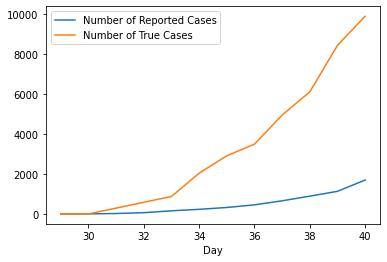

In [ ]:
shorter_table_italy.plot('Day')

# Calculating Mortaltity Rate Over Time Based on our Estimate of True Cases

In this section we will attempt to produce a process in which we can utilize our output for true number of cases of COVID over time to calculate mortality rate (so that mortality rate is self-updated, which is more accurate than an average). To be clear, this means:


Mortality rate = Total Number of Deaths(taken from John Hopkins Data) / True Number of Cases (calculated by our function)




In [ ]:
model = sk.LinearRegression()
x = np.arange(1, (1 + len(list_of_italy))).reshape(-1,1)
#x = np.arange(300).reshape(-1,1)
y = true_cases_list_italy
model.fit( x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)



Linear regression assuming 
## New Section

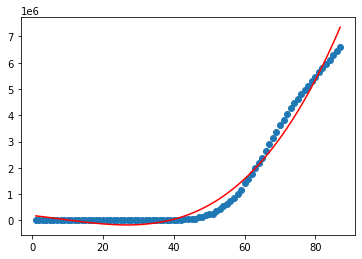

In [ ]:
x_new = np.hstack([x, x**2, x**3])
x_new.shape
model.fit(x_new,y)
plt.scatter(x, y)
y_pred = model.predict(x_new)
plt.plot(x, y_pred, 'r')


In [ ]:
for i in range(100, 150):
  x_guess = [[i, i**2, i**3]]
  print(model.predict(x_guess))

[12209611.5552548]
[12649645.43820638]
[13099695.8356487]
[13559871.12615831]
[14030279.68831174]
[14511029.90068551]
[15002230.14185617]
[15503988.79040024]
[16016414.22489426]
[16539614.82391477]
[17073698.9660383]
[17618775.02984138]
[18174951.39390054]
[18742336.43679233]
[19321038.53709327]
[19911166.0733799]
[20512827.42422875]
[21126130.96821636]
[21751185.08391925]
[22388098.14991397]
[23036978.54477705]
[23697934.64708503]
[24371074.83541442]
[25056507.48834177]
[25754340.98444362]
[26464683.70229651]
[27187644.02047694]
[27923330.31756148]
[28671850.97212665]
[29433314.36274897]
[30207828.868005]
[30995502.86647126]
[31796444.73672427]
[32610762.8573406]
[33438565.60689675]
[34279961.36396927]
[35135058.50713469]
[36003965.41496955]
[36886790.46605038]
[37783642.03895371]
[38694628.51225607]
[39619858.264534]
[40559439.67436405]
[41513481.12032273]
[42482090.98098658]
[43465377.63493213]
[44463449.46073593]
[45476414.83697451]
[46504382.14222439]
[47547459.75506211]


Training Data

In [ ]:
from sklearn.model_selection import train_test_split
y_guess = np.hstack([y, y, y, y])
X_train, X_test, y_train, y_test = train_test_split(x_guess, y_guess, test_size = 0.2, random_state = 0)
regressor = sk.LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

ValueError: ignored

In [ ]:
y_pred = regressor.predict(X_test)

AttributeError: ignored

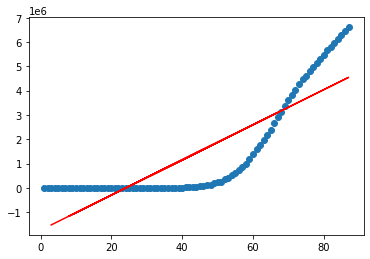

In [ ]:
plt.scatter(x, y)
plt.plot(X_test, y_pred, 'r')